# Online Learning Applications Project

## Project description

[Project specifications](https://docs.google.com/document/d/1e1eOJ3QGHL1TMD1wkYfTILBsqNga3_DNU-puia4SEmk/edit)

#### Scenario
Imagine an ecommerce website which can sell an unlimited number of units of 5 different items without any storage cost.

#### Products and relation graph
In every webpage, a single product, called primary, is displayed together with its price. The user can add a number of units of this product to the cart. After the product has been added to the cart, two products, called secondary, are recommended. When displaying the secondary products, the price is hidden. Furthermore, the products are recommended in two slots, one above the other, thus providing more importance to the product displayed in the slot above. If the user clicks on a secondary product, a new tab on the browser is opened and, in the loaded webpage, the clicked product is displayed as primary together with its price. At the end of the visit over the ecommerce website, the user buys the products added to the cart.

We represent the likelihood of a user clicking on secondary product with the following graph


In [11]:
import numpy as np
from graphviz import Digraph
from graphviz import Source
from config import *
import matplotlib
from matplotlib import pyplot as plt

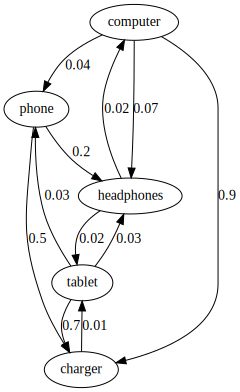

In [12]:


graph_spec = ''
adj_matrix = np.array(config['graph']['adj_matrix'])
products = np.array(config['products'])
for i, product in enumerate(products):
    connected = "".join([product + '->' + item + '\n' for item in [products[j] + f' [label={value}]' for j, value in enumerate(adj_matrix[i]) if value != 0]])
    graph_spec += connected
graph_spec = 'digraph{' + graph_spec + '}'
dot = Source(graph_spec)
dot

For example a user that buys a pc it is very likely that also buys the charger. For tablet and phone instead probability
becomes lower because it is more likely that they already have one at home.
The other edges are read in the same way.


#### New customers behavior and alpha functions
Every day, there is a random number of potential new customers (returning customers are not considered here). In particular, every single customer can land on the webpage in which one of the 5 products is primary or on the webpage of a product sold by a (non-strategic) competitor. Call $\alpha_i$ the ratio of customers landing on the webpage in which product Pi is primary, and call $\alpha_0$ the ratio of customers landing on the webpage of a competitor. In practice, you can only consider the $\alpha$ ratios and disregard the total number of users. However, the $\alpha$ ratios will be subject to noise. That is, every day, the value of the $\alpha$ ratios will be realizations of independent Dirichlet random variables.

The ecommerce website has a budget cap B to spend to advertise its products. For simplicity, assume that the automatic bidding feature provided by the platforms is used and therefore no bidding optimization needs to be performed. The change of the budget spent on the campaign for the product Pi changes the expected value of the corresponding $\alpha_i$, and therefore the number of users landing on the webpage in which product Pi is primary. For every campaign, you can imagine a maximum expected value of $\alpha_i$ (say $\bar{\alpha_i}$) corresponding to the case in which the budget allocated on that campaign is infinite. Therefore, for every campaign, the expected value of $\alpha_i$ will range from 0 to $\bar{\alpha_i}$, depending on the actual budget allocated to that campaign.


We decided to adopt an exponential function to represent the alpha functions

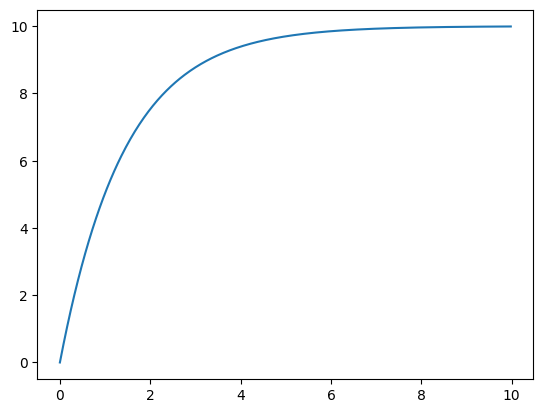

In [10]:
def fun(x, x_bar, speed):
    return x_bar * (1.0 - np.exp(-x * speed))
t1 = np.arange(0.0, 10.0, 0.02)
plt.plot(t1, fun(t1, 10, 0.7))

In this way we can characterize both the maximum number of clicks that can be reached and the speed wrt the budget. Since in our scenario a number of daily users is provided, and we should divide it among all the products we use a dirichlet distribution to model the scenario.